## TUGAS 2 METNUM

## Penjelasan Algoritma Program Dibawah

1. Mengimport modul yang dibutuhkan untuk menjalankan program
2. Meminta dan menginput titik-titik di X dan Y/f(x), dan juga titik yang ingin dicari nilainya
3. Membuat loop dengan "while" agar program terulang sebanyak yang diinginkan
4. Meminta dan menginput pilihan metode yang akan digunakan untuk mengaproksimasi
5. Jika memilih lagrange maka akan dikeluarkan hasil aproksimasi  di titik x yang akan dicari nilainya dengan metode tersebut
6. Jika memilih Newton Divided Difference maka akan diminta untuk memilih kembali apakah ingin menggunakan Forward NDD atau Backward NDD
7. Apabila memilih forward, akan diminta untuk memilih apakah ingin mengeluarkan ddtable atau tidak, bila iya maka tabel akan dikeluarkan dan juga sebaliknya
8. Apabila memilih backward, akan diminta untuk memilih apakah ingin mengeluarkan ddtable atau tidak, bila iya maka tabel akan dikeluarkan dan juga sebaliknya
9. Anda akan diminta untuk memilih mengeluarkan tabel atau plot, bila memilih tabel maka yang dikeluarkan hanyalah tabel hasil, dan bila plot maka hanya plot hasil yang dikeluarkan
10. Program akan kembali ke awal dan bila anda sudah selesai dapat memilih stop (3) untuk mengakhiri program

1.

1. masukkan list titik-titik berurutan(NILAI X): [2,3,4,5,6,8,9]
2. masukkan list nilai fungsi d titik-titik tersebut(NILAI Y): [4,9,16,25,36,64,81]
3. masukkan nilai x yang akan diaproksimasi nilai fungsinya: 7
4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 1
aproks nilai fungsi menggunakan metode lagrange di x = 7 adalah y = 49.00000
4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 2
5. Masukkan pilihan anda forward (1) atau backward (2): 1
6. apakah mau mengeluarkan tabel? yes(1) / no:(2) 1
|   x |   y | DD1   | DD2   | DD3   | DD4   | DD5   | DD6   |
|-----+-----+-------+-------+-------+-------+-------+-------|
|   2 |   4 | 5.0   | 1.0   | 0.0   | 0.0   | 0.0   | 0.0   |
|   3 |   9 | 7.0   | 1.0   | 0.0   | 0.0   | 0.0   |       |
|   4 |  16 | 9.0   | 1.0   | 0.0   | 0.0   |       |       |
|   5 |  25 | 11.0  | 1.0   | 0.0   |       |       |       |
|   6 |  36 | 14.0  | 1.0   |       |       |       |       |
|   8 |  64 | 17.0  |       |    

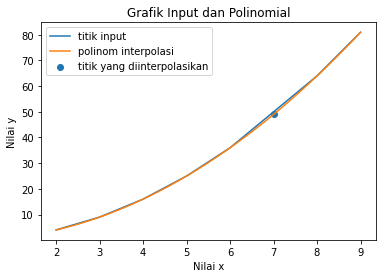

4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 2
5. Masukkan pilihan anda forward (1) atau backward (2): 2
6. apakah mau mengeluarkan tabel? yes(1) / no:(2) 2
anda tidak menginginkan tabel
NDD Polynomial: 49.0000000000000
for x = 7, using Backward NDD, y is approximately 49.00000
Show (1 = table, 2 = plot): 1
|   x |   y |
|-----+-----|
|   2 |   4 |
|   3 |   9 |
|   4 |  16 |
|   5 |  25 |
|   6 |  36 |
|   8 |  64 |
|   9 |  81 |
|   7 |  49 |
4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 3
terimakasih


In [2]:
from tabulate import tabulate # mengimport modul yang akan dipakai agar program jalan
import sympy as sy 
import matplotlib.pyplot as plt
import numpy as np

#untuk memasukkan titik yang diinginkan
titik_x = eval(input('1. masukkan list titik-titik berurutan(NILAI X): '))
titik_y = eval(input('2. masukkan list nilai fungsi d titik-titik tersebut(NILAI Y): '))
eval_x = eval(input('3. masukkan nilai x yang akan diaproksimasi nilai fungsinya: '))

z = sy.Symbol('x') #membuat z memiliki nilai tertentu agar bisa dipanggil

while True: #untuk loop agar bisa terulang
    pilihan = int(input('4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): ')) #meminta pilihan menggunakan metode apa 
    
    if pilihan == 1: #program yang dijalankan bila pilihan nya adalah 1
      def LagrangePol(x,x_points, y_points): #mendefinisikan fungsi lagrange
            pol = 0
            n = len(x_points)
            for k in range(n):
                L = 1
                for i in range(n):
                    if i != k:
                        L*=((x-x_points[i])/(x_points[k]-x_points[i]))
                pol += y_points[k]*L
            return pol

      y_aproks = LagrangePol(eval_x,titik_x,titik_y)
    #print hasil perhitungan lagrange
      print('aproks nilai fungsi menggunakan metode lagrange di x = {0} adalah y = {1:.5f}' .format(eval_x,y_aproks))
        
    if pilihan == 2: #program yang dijalankan bila pilihan adalah 2
      def DDTableGenerator(x_points,y_points): #membuat tabel NDD
        DDTable = [y_points]
        for column in range(1,len(y_points)):
          DDcolumn = []
          for row in range(len(DDTable[-1])-1):
            DD = (DDTable[-1][row+1]-DDTable[-1][row])\
            /(x_points[column+row]-x_points[row])
            DDcolumn.append(round(DD,5))
          DDTable.append(DDcolumn)
        return DDTable

      def TabulateDD(titik_x, titik_y):#menampilkan tabel dd
        '''
        Fungsi untuk menampilkan tabel divided difference dengan tabulate
        '''
        DDTable = DDTableGenerator(titik_x, titik_y)
        DDTable.insert(0,titik_x)
        #membuat tabel DD menjadi matriks persegi agar bisa ditranspose
        for i in range(1, len(DDTable[0]) + 1):
          for j in range(len(DDTable[0]) - len(DDTable[i])):
            DDTable[i].append('')
        head = ['x','y']
        T_DDTable = np.transpose(DDTable)
        #untuk buat header tabel
        for i in range(1,len(DDTable)):
         head.append('DD'+str(i))
        print(tabulate(T_DDTable,headers=head, tablefmt='orgtbl'))

      pilihanNDD = int(input('5. Masukkan pilihan anda forward (1) atau backward (2): ')) #meminta pilihan metode NDD yang akan digunakan
      pilihtabel = int(input("6. apakah mau mengeluarkan tabel? yes(1) / no:(2) ")) #meminta pilihan apakah ingin mengeluarkan tabel atau tidak

      if pilihanNDD == 1: #program bila yang dipilih adalah NDD 1
        def ForwardDD(x,x_points,y_points): #definisikan fungsi forward dd
         DDTable = DDTableGenerator(x_points,y_points)
         pol = DDTable[0][0]
         pol2 = DDTable[0][0] 
         mult_term = 1
         mult_term2 = 1 
         for k in range(1,len(DDTable)):
            mult_term*=(x-x_points[k-1])               
            mult_term2*=(z-x_points[k-1]) 
            pol+=DDTable[k][0]*mult_term
            pol2+=DDTable[k][0]*mult_term2
            polz = sy.expand(pol2)
         return pol,polz,DDTable
        forw_approx,y_display,DDTable = ForwardDD(eval_x,titik_x,titik_y)
        if pilihtabel == 1: #mengeluarkan hasil dari pilihan mengeluarkan tabel
          TabulateDD(titik_x,titik_y)
        if pilihtabel == 2:
          print("anda tidak menginginkan tabel")
        print('NDD Polynomial: {0}'.format(y_display)) #mengeluarkan polinom
        print('for x = {0}, using Forward NDD, y is approximately {1:.5f}'.format(eval_x,forw_approx)) #mengeluarkan hasil forward ndd
        
        graph = int(input('Show (1 = table, 2 = plot): '))#meminta pilihan jenis graph
        if graph == 1: #mengeluarkan tabel
          titik_x.append(eval_x)
          titik_y.append(forw_approx)
          points=[]
          for i in range(len(titik_x)):
            points.append((titik_x[i],titik_y[i]))
          print(tabulate(points,headers=['x', 'y'],tablefmt='orgtbl'))
        if graph == 2:#mengeluarkan plot
          pol_y = []
          pol_x = np.linspace(titik_x[0],titik_x[-1], 1000)
          for i in pol_x:
            pol_y.append(y_display.subs(z,i))
        
          plt.plot(titik_x,titik_y, label="titik input")
          plt.plot(pol_x,pol_y, label="polinom interpolasi")
          plt.scatter(eval_x,forw_approx, label="titik yang diinterpolasikan")
          plt.xlabel('Nilai x')
          plt.ylabel('Nilai y')
          plt.legend()
          plt.title('Grafik Input dan Polinomial')
          plt.legend()
          plt.show()

      
      
      if pilihanNDD == 2:#program bila yang dipilih adalah NDD 2
        def BackwardDD(x,x_points,y_points):#mendefinisikan backward dd
         DDTable = DDTableGenerator(x_points,y_points)
         pol = DDTable[0][-1]
         pol2 = DDTable[0][-1]  
         mult_term = 1 
         mult_term2 = 1 
         for k in range(1,len(DDTable)):
            mult_term*=(x-x_points[-k]) 
            mult_term2*=(x-x_points[-k])
            pol+=DDTable[k][-1]*mult_term
            pol2+=DDTable[k][-1]*mult_term2
            polz = sy.expand(pol2)
         return pol,polz,DDTable
        back_approx,y_display,DDTable = BackwardDD(eval_x,titik_x,titik_y)
        
        if pilihtabel == 1: #mengeluarkan hasil dari pilihan mengeluarkan tabel
         TabulateDD(titik_x,titik_y)
        if pilihtabel == 2:
         print("anda tidak menginginkan tabel")
        print('NDD Polynomial: {0}'.format(y_display)) #mengeluarkan polinom
        print('for x = {0}, using Backward NDD, y is approximately {1:.5f}'.format(eval_x,forw_approx)) #mengeluarkan hasil backward ndd
        
        
        graph = int(input('Show (1 = table, 2 = plot): '))#meminta pilihan jenis graph
        if graph == 1: #mengeluarkan tabel
          titik_x.append(eval_x)
          titik_y.append(back_approx)
          points=[]
          for i in range(len(titik_x)):
            points.append((titik_x[i],titik_y[i]))
          print(tabulate(points,headers=['x', 'y'],tablefmt='orgtbl'))
        
        if graph == 2:#mengeluarkan plot
          pol_y = []
          pol_x = np.linspace(titik_x[0],titik_x[-1], 1000)
          for i in pol_x:
            pol_y.append(y_display.subs(z,i))
        
          plt.plot(titik_x,titik_y, label="titik input")
          plt.plot(pol_x,pol_y, label="polinom interpolasi")
          plt.scatter(eval_x,back_approx, label="titik yang diinterpolasikan")
          plt.xlabel('Nilai x')
          plt.ylabel('Nilai y')
          plt.legend()
          plt.title('Grafik Input dan Polinomial')
          plt.legend()
          plt.show()

   
   
    if pilihan == 3: #untuk mengakhiri loop
        print("terimakasih")
        break

## 2

lagrange

In [2]:
from tabulate import tabulate # mengimport modul yang akan dipakai agar program jalan
import sympy as sy 
import matplotlib.pyplot as plt
import numpy as np

#untuk memasukkan titik yang diinginkan
titik_x = eval(input('1. masukkan list titik-titik berurutan(NILAI X): '))
titik_y = eval(input('2. masukkan list nilai fungsi d titik-titik tersebut(NILAI Y): '))
eval_x = eval(input('3. masukkan nilai x yang akan diaproksimasi nilai fungsinya: '))

z = sy.Symbol('x') #membuat z memiliki nilai tertentu agar bisa dipanggil

while True: #untuk loop agar bisa terulang
    pilihan = int(input('4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): ')) #meminta pilihan menggunakan metode apa 
    
    if pilihan == 1: #program yang dijalankan bila pilihan nya adalah 1
      def LagrangePol(x,x_points, y_points): #mendefinisikan fungsi lagrange
            pol = 0
            n = len(x_points)
            for k in range(n):
                L = 1
                for i in range(n):
                    if i != k:
                        L*=((x-x_points[i])/(x_points[k]-x_points[i]))
                pol += y_points[k]*L
            return pol

      y_aproks = LagrangePol(eval_x,titik_x,titik_y)
    #print hasil perhitungan lagrange
      print('aproks nilai fungsi menggunakan metode lagrange di x = {0} adalah y = {1:.5f}' .format(eval_x,y_aproks))
        
    if pilihan == 2: #program yang dijalankan bila pilihan adalah 2
      def DDTableGenerator(x_points,y_points): #membuat tabel NDD
        DDTable = [y_points]
        for column in range(1,len(y_points)):
          DDcolumn = []
          for row in range(len(DDTable[-1])-1):
            DD = (DDTable[-1][row+1]-DDTable[-1][row])\
            /(x_points[column+row]-x_points[row])
            DDcolumn.append(round(DD,5))
          DDTable.append(DDcolumn)
        return DDTable

      def TabulateDD(titik_x, titik_y):#menampilkan tabel dd
        '''
        Fungsi untuk menampilkan tabel divided difference dengan tabulate
        '''
        DDTable = DDTableGenerator(titik_x, titik_y)
        DDTable.insert(0,titik_x)
        #membuat tabel DD menjadi matriks persegi agar bisa ditranspose
        for i in range(1, len(DDTable[0]) + 1):
          for j in range(len(DDTable[0]) - len(DDTable[i])):
            DDTable[i].append('')
        head = ['x','y']
        T_DDTable = np.transpose(DDTable)
        #untuk buat header tabel
        for i in range(1,len(DDTable)):
         head.append('DD'+str(i))
        print(tabulate(T_DDTable,headers=head, tablefmt='orgtbl'))

      pilihanNDD = int(input('5. Masukkan pilihan anda forward (1) atau backward (2): ')) #meminta pilihan metode NDD yang akan digunakan
      pilihtabel = int(input("6. apakah mau mengeluarkan tabel? yes(1) / no:(2) ")) #meminta pilihan apakah ingin mengeluarkan tabel atau tidak

      if pilihanNDD == 1: #program bila yang dipilih adalah NDD 1
        def ForwardDD(x,x_points,y_points): #definisikan fungsi forward dd
         DDTable = DDTableGenerator(x_points,y_points)
         pol = DDTable[0][0]
         pol2 = DDTable[0][0] 
         mult_term = 1
         mult_term2 = 1 
         for k in range(1,len(DDTable)):
            mult_term*=(x-x_points[k-1])               
            mult_term2*=(z-x_points[k-1]) 
            pol+=DDTable[k][0]*mult_term
            pol2+=DDTable[k][0]*mult_term2
            polz = sy.expand(pol2)
         return pol,polz,DDTable
        forw_approx,y_display,DDTable = ForwardDD(eval_x,titik_x,titik_y)
        if pilihtabel == 1: #mengeluarkan hasil dari pilihan mengeluarkan tabel
          TabulateDD(titik_x,titik_y)
        if pilihtabel == 2:
          print("anda tidak menginginkan tabel")
        print('NDD Polynomial: {0}'.format(y_display)) #mengeluarkan polinom
        print('for x = {0}, using Forward NDD, y is approximately {1:.5f}'.format(eval_x,forw_approx)) #mengeluarkan hasil forward ndd
        
        graph = int(input('Show (1 = table, 2 = plot): '))#meminta pilihan jenis graph
        if graph == 1: #mengeluarkan tabel
          titik_x.append(eval_x)
          titik_y.append(forw_approx)
          points=[]
          for i in range(len(titik_x)):
            points.append((titik_x[i],titik_y[i]))
          print(tabulate(points,headers=['x', 'y'],tablefmt='orgtbl'))
        if graph == 2:#mengeluarkan plot
          pol_y = []
          pol_x = np.linspace(titik_x[0],titik_x[-1], 1000)
          for i in pol_x:
            pol_y.append(y_display.subs(z,i))
        
          plt.plot(titik_x,titik_y, label="titik input")
          plt.plot(pol_x,pol_y, label="polinom interpolasi")
          plt.scatter(eval_x,forw_approx, label="titik yang diinterpolasikan")
          plt.xlabel('Nilai x')
          plt.ylabel('Nilai y')
          plt.legend()
          plt.title('Grafik Input dan Polinomial')
          plt.legend()
          plt.show()

      
      
      if pilihanNDD == 2:#program bila yang dipilih adalah NDD 2
        def BackwardDD(x,x_points,y_points):#mendefinisikan backward dd
         DDTable = DDTableGenerator(x_points,y_points)
         pol = DDTable[0][-1]
         pol2 = DDTable[0][-1]  
         mult_term = 1 
         mult_term2 = 1 
         for k in range(1,len(DDTable)):
            mult_term*=(x-x_points[-k]) 
            mult_term2*=(x-x_points[-k])
            pol+=DDTable[k][-1]*mult_term
            pol2+=DDTable[k][-1]*mult_term2
            polz = sy.expand(pol2)
         return pol,polz,DDTable
        back_approx,y_display,DDTable = BackwardDD(eval_x,titik_x,titik_y)
        
        if pilihtabel == 1: #mengeluarkan hasil dari pilihan mengeluarkan tabel
         TabulateDD(titik_x,titik_y)
        if pilihtabel == 2:
         print("anda tidak menginginkan tabel")
        print('NDD Polynomial: {0}'.format(y_display)) #mengeluarkan polinom
        print('for x = {0}, using Backward NDD, y is approximately {1:.5f}'.format(eval_x,forw_approx)) #mengeluarkan hasil backward ndd
        
        
        graph = int(input('Show (1 = table, 2 = plot): '))#meminta pilihan jenis graph
        if graph == 1: #mengeluarkan tabel
          titik_x.append(eval_x)
          titik_y.append(back_approx)
          points=[]
          for i in range(len(titik_x)):
            points.append((titik_x[i],titik_y[i]))
          print(tabulate(points,headers=['x', 'y'],tablefmt='orgtbl'))
        
        if graph == 2:#mengeluarkan plot
          pol_y = []
          pol_x = np.linspace(titik_x[0],titik_x[-1], 1000)
          for i in pol_x:
            pol_y.append(y_display.subs(z,i))
        
          plt.plot(titik_x,titik_y, label="titik input")
          plt.plot(pol_x,pol_y, label="polinom interpolasi")
          plt.scatter(eval_x,back_approx, label="titik yang diinterpolasikan")
          plt.xlabel('Nilai x')
          plt.ylabel('Nilai y')
          plt.legend()
          plt.title('Grafik Input dan Polinomial')
          plt.legend()
          plt.show()

   
   
    if pilihan == 3: #untuk mengakhiri loop
        print("terimakasih")
        break

1. masukkan list titik-titik berurutan(NILAI X): [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
2. masukkan list nilai fungsi d titik-titik tersebut(NILAI Y): [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
3. masukkan nilai x yang akan diaproksimasi nilai fungsinya: 3.5
4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 1
aproks nilai fungsi menggunakan metode lagrange di x = 3.5 adalah y = -18.68276
4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 3
terimakasih


Forward NDD

1. masukkan list titik-titik berurutan(NILAI X): [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
2. masukkan list nilai fungsi d titik-titik tersebut(NILAI Y): [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
3. masukkan nilai x yang akan diaproksimasi nilai fungsinya: 3.5
4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 2
5. Masukkan pilihan anda forward (1) atau backward (2): 1
6. apakah mau mengeluarkan tabel? yes(1) / no:(2) 1
|    x |    y | DD1      | DD2        | DD3        | DD4         | DD5        | DD6        | DD7       |
|------+------+----------+------------+------------+-------------+------------+------------+-----------|
| 2    |  4.9 | 10.0     | 28.0       | 2195.55557 | -2056.15477 | 1149.60361 | -594.84683 | 269.79934 |
| 2.15 |  6.4 | 17.0     | 686.66667  | -641.93801 | 358.01281   | -182.85329 | 79.65151   |           |
| 2.25 |  8.1 | 120.0    | -102.91708 | 56.18697   | -24.15056   | 4.32776    |            |           |
| 2.3  | 14.1 | 3.7037   | 1.02881    | 8.1273

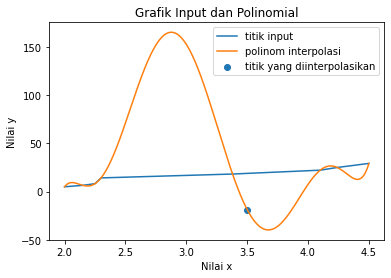

4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 2
5. Masukkan pilihan anda forward (1) atau backward (2): 1
6. apakah mau mengeluarkan tabel? yes(1) / no:(2) 2
anda tidak menginginkan tabel
NDD Polynomial: 269.79934*x**7 - 6104.1493528*x**6 + 58230.499288898*x**5 - 303330.796658044*x**4 + 931166.282613257*x**3 - 1683847.79714831*x**2 + 1660836.12810009*x - 689558.416169804
for x = 3.5, using Forward NDD, y is approximately -18.68277
Show (1 = table, 2 = plot): 1
|    x |        y |
|------+----------|
| 2    |   4.9    |
| 2.15 |   6.4    |
| 2.25 |   8.1    |
| 2.3  |  14.1    |
| 3.38 |  18.1    |
| 4.1  |  22.1    |
| 4.24 |  24.9    |
| 4.5  |  29.1    |
| 3.5  | -18.6828 |
4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 3
terimakasih


In [3]:
from tabulate import tabulate # mengimport modul yang akan dipakai agar program jalan
import sympy as sy 
import matplotlib.pyplot as plt
import numpy as np

#untuk memasukkan titik yang diinginkan
titik_x = eval(input('1. masukkan list titik-titik berurutan(NILAI X): '))
titik_y = eval(input('2. masukkan list nilai fungsi d titik-titik tersebut(NILAI Y): '))
eval_x = eval(input('3. masukkan nilai x yang akan diaproksimasi nilai fungsinya: '))

z = sy.Symbol('x') #membuat z memiliki nilai tertentu agar bisa dipanggil

while True: #untuk loop agar bisa terulang
    pilihan = int(input('4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): ')) #meminta pilihan menggunakan metode apa 
    
    if pilihan == 1: #program yang dijalankan bila pilihan nya adalah 1
      def LagrangePol(x,x_points, y_points): #mendefinisikan fungsi lagrange
            pol = 0
            n = len(x_points)
            for k in range(n):
                L = 1
                for i in range(n):
                    if i != k:
                        L*=((x-x_points[i])/(x_points[k]-x_points[i]))
                pol += y_points[k]*L
            return pol

      y_aproks = LagrangePol(eval_x,titik_x,titik_y)
    #print hasil perhitungan lagrange
      print('aproks nilai fungsi menggunakan metode lagrange di x = {0} adalah y = {1:.5f}' .format(eval_x,y_aproks))
        
    if pilihan == 2: #program yang dijalankan bila pilihan adalah 2
      def DDTableGenerator(x_points,y_points): #membuat tabel NDD
        DDTable = [y_points]
        for column in range(1,len(y_points)):
          DDcolumn = []
          for row in range(len(DDTable[-1])-1):
            DD = (DDTable[-1][row+1]-DDTable[-1][row])\
            /(x_points[column+row]-x_points[row])
            DDcolumn.append(round(DD,5))
          DDTable.append(DDcolumn)
        return DDTable

      def TabulateDD(titik_x, titik_y):#menampilkan tabel dd
        '''
        Fungsi untuk menampilkan tabel divided difference dengan tabulate
        '''
        DDTable = DDTableGenerator(titik_x, titik_y)
        DDTable.insert(0,titik_x)
        #membuat tabel DD menjadi matriks persegi agar bisa ditranspose
        for i in range(1, len(DDTable[0]) + 1):
          for j in range(len(DDTable[0]) - len(DDTable[i])):
            DDTable[i].append('')
        head = ['x','y']
        T_DDTable = np.transpose(DDTable)
        #untuk buat header tabel
        for i in range(1,len(DDTable)):
         head.append('DD'+str(i))
        print(tabulate(T_DDTable,headers=head, tablefmt='orgtbl'))

      pilihanNDD = int(input('5. Masukkan pilihan anda forward (1) atau backward (2): ')) #meminta pilihan metode NDD yang akan digunakan
      pilihtabel = int(input("6. apakah mau mengeluarkan tabel? yes(1) / no:(2) ")) #meminta pilihan apakah ingin mengeluarkan tabel atau tidak

      if pilihanNDD == 1: #program bila yang dipilih adalah NDD 1
        def ForwardDD(x,x_points,y_points): #definisikan fungsi forward dd
         DDTable = DDTableGenerator(x_points,y_points)
         pol = DDTable[0][0]
         pol2 = DDTable[0][0] 
         mult_term = 1
         mult_term2 = 1 
         for k in range(1,len(DDTable)):
            mult_term*=(x-x_points[k-1])               
            mult_term2*=(z-x_points[k-1]) 
            pol+=DDTable[k][0]*mult_term
            pol2+=DDTable[k][0]*mult_term2
            polz = sy.expand(pol2)
         return pol,polz,DDTable
        forw_approx,y_display,DDTable = ForwardDD(eval_x,titik_x,titik_y)
        if pilihtabel == 1: #mengeluarkan hasil dari pilihan mengeluarkan tabel
          TabulateDD(titik_x,titik_y)
        if pilihtabel == 2:
          print("anda tidak menginginkan tabel")
        print('NDD Polynomial: {0}'.format(y_display)) #mengeluarkan polinom
        print('for x = {0}, using Forward NDD, y is approximately {1:.5f}'.format(eval_x,forw_approx)) #mengeluarkan hasil forward ndd
        
        graph = int(input('Show (1 = table, 2 = plot): '))#meminta pilihan jenis graph
        if graph == 1: #mengeluarkan tabel
          titik_x.append(eval_x)
          titik_y.append(forw_approx)
          points=[]
          for i in range(len(titik_x)):
            points.append((titik_x[i],titik_y[i]))
          print(tabulate(points,headers=['x', 'y'],tablefmt='orgtbl'))
        if graph == 2:#mengeluarkan plot
          pol_y = []
          pol_x = np.linspace(titik_x[0],titik_x[-1], 1000)
          for i in pol_x:
            pol_y.append(y_display.subs(z,i))
        
          plt.plot(titik_x,titik_y, label="titik input")
          plt.plot(pol_x,pol_y, label="polinom interpolasi")
          plt.scatter(eval_x,forw_approx, label="titik yang diinterpolasikan")
          plt.xlabel('Nilai x')
          plt.ylabel('Nilai y')
          plt.legend()
          plt.title('Grafik Input dan Polinomial')
          plt.legend()
          plt.show()

      
      
      if pilihanNDD == 2:#program bila yang dipilih adalah NDD 2
        def BackwardDD(x,x_points,y_points):#mendefinisikan backward dd
         DDTable = DDTableGenerator(x_points,y_points)
         pol = DDTable[0][-1]
         pol2 = DDTable[0][-1]  
         mult_term = 1 
         mult_term2 = 1 
         for k in range(1,len(DDTable)):
            mult_term*=(x-x_points[-k]) 
            mult_term2*=(x-x_points[-k])
            pol+=DDTable[k][-1]*mult_term
            pol2+=DDTable[k][-1]*mult_term2
            polz = sy.expand(pol2)
         return pol,polz,DDTable
        back_approx,y_display,DDTable = BackwardDD(eval_x,titik_x,titik_y)
        
        if pilihtabel == 1: #mengeluarkan hasil dari pilihan mengeluarkan tabel
         TabulateDD(titik_x,titik_y)
        if pilihtabel == 2:
         print("anda tidak menginginkan tabel")
        print('NDD Polynomial: {0}'.format(y_display)) #mengeluarkan polinom
        print('for x = {0}, using Backward NDD, y is approximately {1:.5f}'.format(eval_x,forw_approx)) #mengeluarkan hasil backward ndd
        
        
        graph = int(input('Show (1 = table, 2 = plot): '))#meminta pilihan jenis graph
        if graph == 1: #mengeluarkan tabel
          titik_x.append(eval_x)
          titik_y.append(back_approx)
          points=[]
          for i in range(len(titik_x)):
            points.append((titik_x[i],titik_y[i]))
          print(tabulate(points,headers=['x', 'y'],tablefmt='orgtbl'))
        
        if graph == 2:#mengeluarkan plot
          pol_y = []
          pol_x = np.linspace(titik_x[0],titik_x[-1], 1000)
          for i in pol_x:
            pol_y.append(y_display.subs(z,i))
        
          plt.plot(titik_x,titik_y, label="titik input")
          plt.plot(pol_x,pol_y, label="polinom interpolasi")
          plt.scatter(eval_x,back_approx, label="titik yang diinterpolasikan")
          plt.xlabel('Nilai x')
          plt.ylabel('Nilai y')
          plt.legend()
          plt.title('Grafik Input dan Polinomial')
          plt.legend()
          plt.show()

   
   
    if pilihan == 3: #untuk mengakhiri loop
        print("terimakasih")
        break

Backward NDD

1. masukkan list titik-titik berurutan(NILAI X): [2,2.15,2.25,2.3,3.38,4.1,4.24,4.5]
2. masukkan list nilai fungsi d titik-titik tersebut(NILAI Y): [4.9,6.4,8.1,14.1,18.1,22.1,24.9,29.1]
3. masukkan nilai x yang akan diaproksimasi nilai fungsinya: 3.5
4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 2
5. Masukkan pilihan anda forward (1) atau backward (2): 2
6. apakah mau mengeluarkan tabel? yes(1) / no:(2) 1
|    x |    y | DD1      | DD2        | DD3        | DD4         | DD5        | DD6        | DD7       |
|------+------+----------+------------+------------+-------------+------------+------------+-----------|
| 2    |  4.9 | 10.0     | 28.0       | 2195.55557 | -2056.15477 | 1149.60361 | -594.84683 | 269.79934 |
| 2.15 |  6.4 | 17.0     | 686.66667  | -641.93801 | 358.01281   | -182.85329 | 79.65151   |           |
| 2.25 |  8.1 | 120.0    | -102.91708 | 56.18697   | -24.15056   | 4.32776    |            |           |
| 2.3  | 14.1 | 3.7037   | 1.02881    | 8.1273

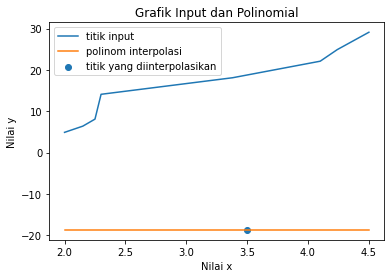

4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 2
5. Masukkan pilihan anda forward (1) atau backward (2): 2
6. apakah mau mengeluarkan tabel? yes(1) / no:(2) 2
anda tidak menginginkan tabel
NDD Polynomial: -18.6827643258400
for x = 3.5, using Backward NDD, y is approximately -18.68277
Show (1 = table, 2 = plot): 1
|    x |        y |
|------+----------|
| 2    |   4.9    |
| 2.15 |   6.4    |
| 2.25 |   8.1    |
| 2.3  |  14.1    |
| 3.38 |  18.1    |
| 4.1  |  22.1    |
| 4.24 |  24.9    |
| 4.5  |  29.1    |
| 3.5  | -18.6828 |
4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): 3
terimakasih


In [4]:
from tabulate import tabulate # mengimport modul yang akan dipakai agar program jalan
import sympy as sy 
import matplotlib.pyplot as plt
import numpy as np

#untuk memasukkan titik yang diinginkan
titik_x = eval(input('1. masukkan list titik-titik berurutan(NILAI X): '))
titik_y = eval(input('2. masukkan list nilai fungsi d titik-titik tersebut(NILAI Y): '))
eval_x = eval(input('3. masukkan nilai x yang akan diaproksimasi nilai fungsinya: '))

z = sy.Symbol('x') #membuat z memiliki nilai tertentu agar bisa dipanggil

while True: #untuk loop agar bisa terulang
    pilihan = int(input('4. Masukkan pilihan anda lagrange (1) atau NDD (2) atau stop(3): ')) #meminta pilihan menggunakan metode apa 
    
    if pilihan == 1: #program yang dijalankan bila pilihan nya adalah 1
      def LagrangePol(x,x_points, y_points): #mendefinisikan fungsi lagrange
            pol = 0
            n = len(x_points)
            for k in range(n):
                L = 1
                for i in range(n):
                    if i != k:
                        L*=((x-x_points[i])/(x_points[k]-x_points[i]))
                pol += y_points[k]*L
            return pol

      y_aproks = LagrangePol(eval_x,titik_x,titik_y)
    #print hasil perhitungan lagrange
      print('aproks nilai fungsi menggunakan metode lagrange di x = {0} adalah y = {1:.5f}' .format(eval_x,y_aproks))
        
    if pilihan == 2: #program yang dijalankan bila pilihan adalah 2
      def DDTableGenerator(x_points,y_points): #membuat tabel NDD
        DDTable = [y_points]
        for column in range(1,len(y_points)):
          DDcolumn = []
          for row in range(len(DDTable[-1])-1):
            DD = (DDTable[-1][row+1]-DDTable[-1][row])\
            /(x_points[column+row]-x_points[row])
            DDcolumn.append(round(DD,5))
          DDTable.append(DDcolumn)
        return DDTable

      def TabulateDD(titik_x, titik_y):#menampilkan tabel dd
        '''
        Fungsi untuk menampilkan tabel divided difference dengan tabulate
        '''
        DDTable = DDTableGenerator(titik_x, titik_y)
        DDTable.insert(0,titik_x)
        #membuat tabel DD menjadi matriks persegi agar bisa ditranspose
        for i in range(1, len(DDTable[0]) + 1):
          for j in range(len(DDTable[0]) - len(DDTable[i])):
            DDTable[i].append('')
        head = ['x','y']
        T_DDTable = np.transpose(DDTable)
        #untuk buat header tabel
        for i in range(1,len(DDTable)):
         head.append('DD'+str(i))
        print(tabulate(T_DDTable,headers=head, tablefmt='orgtbl'))

      pilihanNDD = int(input('5. Masukkan pilihan anda forward (1) atau backward (2): ')) #meminta pilihan metode NDD yang akan digunakan
      pilihtabel = int(input("6. apakah mau mengeluarkan tabel? yes(1) / no:(2) ")) #meminta pilihan apakah ingin mengeluarkan tabel atau tidak

      if pilihanNDD == 1: #program bila yang dipilih adalah NDD 1
        def ForwardDD(x,x_points,y_points): #definisikan fungsi forward dd
         DDTable = DDTableGenerator(x_points,y_points)
         pol = DDTable[0][0]
         pol2 = DDTable[0][0] 
         mult_term = 1
         mult_term2 = 1 
         for k in range(1,len(DDTable)):
            mult_term*=(x-x_points[k-1])               
            mult_term2*=(z-x_points[k-1]) 
            pol+=DDTable[k][0]*mult_term
            pol2+=DDTable[k][0]*mult_term2
            polz = sy.expand(pol2)
         return pol,polz,DDTable
        forw_approx,y_display,DDTable = ForwardDD(eval_x,titik_x,titik_y)
        if pilihtabel == 1: #mengeluarkan hasil dari pilihan mengeluarkan tabel
          TabulateDD(titik_x,titik_y)
        if pilihtabel == 2:
          print("anda tidak menginginkan tabel")
        print('NDD Polynomial: {0}'.format(y_display)) #mengeluarkan polinom
        print('for x = {0}, using Forward NDD, y is approximately {1:.5f}'.format(eval_x,forw_approx)) #mengeluarkan hasil forward ndd
        
        graph = int(input('Show (1 = table, 2 = plot): '))#meminta pilihan jenis graph
        if graph == 1: #mengeluarkan tabel
          titik_x.append(eval_x)
          titik_y.append(forw_approx)
          points=[]
          for i in range(len(titik_x)):
            points.append((titik_x[i],titik_y[i]))
          print(tabulate(points,headers=['x', 'y'],tablefmt='orgtbl'))
        if graph == 2:#mengeluarkan plot
          pol_y = []
          pol_x = np.linspace(titik_x[0],titik_x[-1], 1000)
          for i in pol_x:
            pol_y.append(y_display.subs(z,i))
        
          plt.plot(titik_x,titik_y, label="titik input")
          plt.plot(pol_x,pol_y, label="polinom interpolasi")
          plt.scatter(eval_x,forw_approx, label="titik yang diinterpolasikan")
          plt.xlabel('Nilai x')
          plt.ylabel('Nilai y')
          plt.legend()
          plt.title('Grafik Input dan Polinomial')
          plt.legend()
          plt.show()

      
      
      if pilihanNDD == 2:#program bila yang dipilih adalah NDD 2
        def BackwardDD(x,x_points,y_points):#mendefinisikan backward dd
         DDTable = DDTableGenerator(x_points,y_points)
         pol = DDTable[0][-1]
         pol2 = DDTable[0][-1]  
         mult_term = 1 
         mult_term2 = 1 
         for k in range(1,len(DDTable)):
            mult_term*=(x-x_points[-k]) 
            mult_term2*=(x-x_points[-k])
            pol+=DDTable[k][-1]*mult_term
            pol2+=DDTable[k][-1]*mult_term2
            polz = sy.expand(pol2)
         return pol,polz,DDTable
        back_approx,y_display,DDTable = BackwardDD(eval_x,titik_x,titik_y)
        
        if pilihtabel == 1: #mengeluarkan hasil dari pilihan mengeluarkan tabel
         TabulateDD(titik_x,titik_y)
        if pilihtabel == 2:
         print("anda tidak menginginkan tabel")
        print('NDD Polynomial: {0}'.format(y_display)) #mengeluarkan polinom
        print('for x = {0}, using Backward NDD, y is approximately {1:.5f}'.format(eval_x,forw_approx)) #mengeluarkan hasil backward ndd
        
        
        graph = int(input('Show (1 = table, 2 = plot): '))#meminta pilihan jenis graph
        if graph == 1: #mengeluarkan tabel
          titik_x.append(eval_x)
          titik_y.append(back_approx)
          points=[]
          for i in range(len(titik_x)):
            points.append((titik_x[i],titik_y[i]))
          print(tabulate(points,headers=['x', 'y'],tablefmt='orgtbl'))
        
        if graph == 2:#mengeluarkan plot
          pol_y = []
          pol_x = np.linspace(titik_x[0],titik_x[-1], 1000)
          for i in pol_x:
            pol_y.append(y_display.subs(z,i))
        
          plt.plot(titik_x,titik_y, label="titik input")
          plt.plot(pol_x,pol_y, label="polinom interpolasi")
          plt.scatter(eval_x,back_approx, label="titik yang diinterpolasikan")
          plt.xlabel('Nilai x')
          plt.ylabel('Nilai y')
          plt.legend()
          plt.title('Grafik Input dan Polinomial')
          plt.legend()
          plt.show()

   
   
    if pilihan == 3: #untuk mengakhiri loop
        print("terimakasih")
        break

## Kesimpulan

Dari program yang sudah dijalankan diatas, dapat disimpulkan bahwa dengan menggunakan tiga metode yang berbeda yaitu lagrange, Forward NDD dan Backward NDD, ketiganya mengeluarkan hasil aproksimasi yang hampir sama untuk waktu 3,5 menit yaitu di sekitar -18,.... Oleh karena itu dapat disimpulkan bahwa hasil dari mengaproksimasi dengan salah satu dari ketiga metode yang ada dapat mengeluarkan hasil aproksimasi yang hampir sama. 